In [1]:
import cartopy.crs as ccrs
import cartopy
from cartopy import feature as cf
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import metpy

In [2]:
import metpy.calc as mpcals
from metpy.units import units

In [3]:
single_level= xr.open_dataset("SingleLevel.nc")
multi_level= xr.open_dataset("MultiLevel.nc")

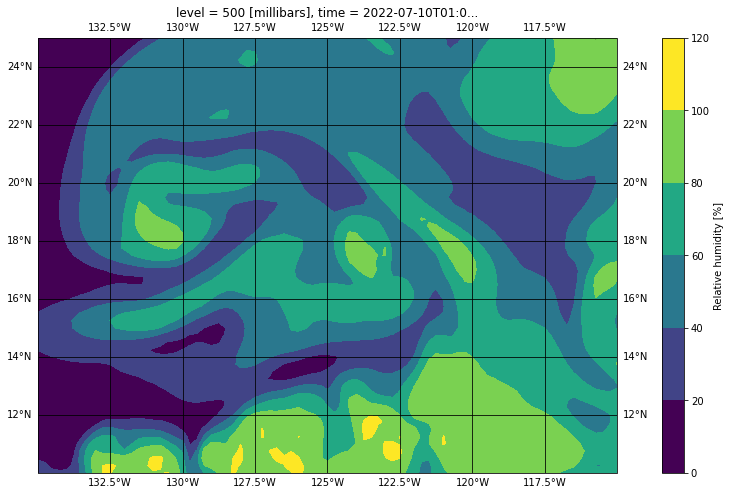

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
#single_level.msl[i,:,:].plot.contour()
multi_level.r[1,1,:,:].plot.contourf()
#plt.savefig(f'tt{i}.png')

In [4]:
multi_level['mix_ratio_500'] = mpcals.mixing_ratio_from_relative_humidity(500* units.hPa, multi_level.t[:,1,:,:], multi_level.r[:,1,:,:])

In [5]:
multi_level['vapour_pressure_500'] = mpcals.vapor_pressure(500* units.hPa, multi_level.mix_ratio_500[:,:,:])

In [6]:
multi_level['dew_point_500'] = mpcals.dewpoint(multi_level.vapour_pressure_500[:,:,:])

C:\Users\My\anaconda3\lib\site-packages\metpy\calc\thermo.py:1114: RuntimeWarning: invalid value encountered in log
  val = np.log(vapor_pressure / mpconsts.nounit.sat_pressure_0c)


In [7]:
multi_level['dw_500_K'] = multi_level.dew_point_500 * units.kelvin

In [11]:
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 81, latitude: 61, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -135.0 -134.8 ... -115.2 -115.0
  * latitude             (latitude) float32 25.0 24.75 24.5 ... 10.5 10.25 10.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:0...
Data variables: (12/16)
    cc                   (time, level, latitude, longitude) float32 ...
    z                    (time, level, latitude, longitude) float32 ...
    r                    (time, level, latitude, longitude) float32 ...
    ciwc                 (time, level, latitude, longitude) float32 ...
    clwc                 (time, level, latitude, longitude) float32 ...
    q                    (time, level, latitude, longitude) float32 ...
    ...                   ...
    w                    (time, level, latitude, longitude) float32 ...
    vo                   (time, level, latitude, longitude) float32 ...
    mix_ratio_500        (time, latitude, longitude) float32 <Quantity([[[0.0...
    vapour_pressure_500  (time, latitude, longitude) float32 <Quantity([[[0.7...
    dew_point_500        (time, latitude, longitude) float32 <Quantity([[[-26...
    dw_500_K             (time, latitude, longitude) float32 <Quantity([[[246...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:40:42 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
multi_level['EqPT_Deneme']= mpcals.equivalent_potential_temperature(500 * units.hPa, multi_level.t[:,1,:,:], multi_level.dew_point_500[:,:,:])

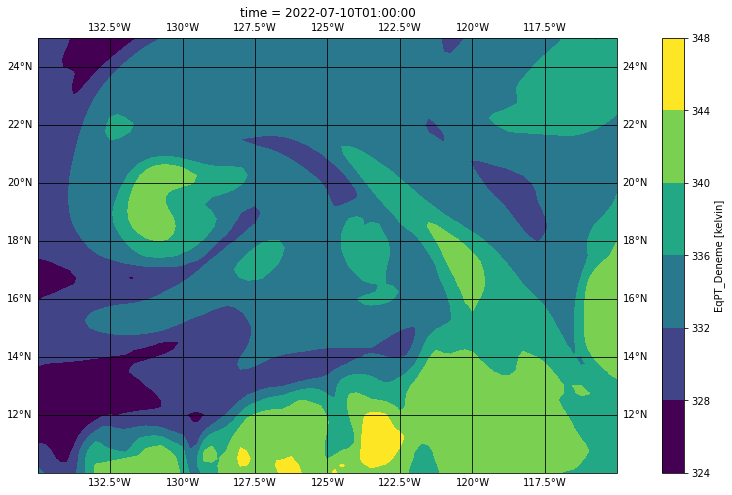

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
#plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True, color='black')
#single_level.msl[i,:,:].plot.contour()
multi_level.EqPT_Deneme[1,:,:].plot.contourf()
#plt.savefig(f'tt{i}.png')

In [9]:
multi_level['EqPT_Deneme_Derece']= multi_level.EqPT_Deneme[:,:,:] - 273* units.kelvin

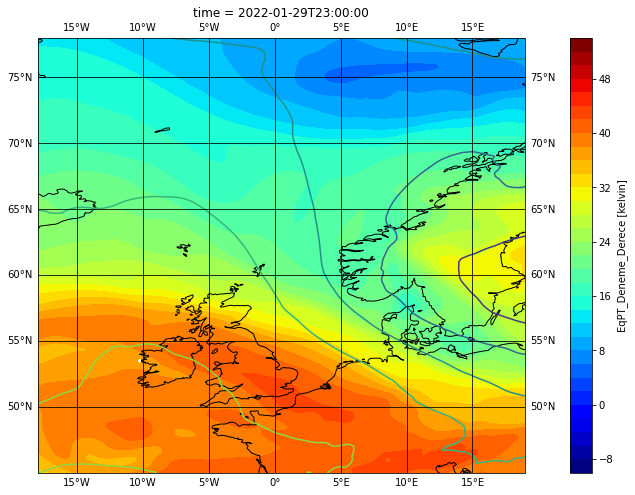

In [13]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    multi_level.EqPT_Deneme_Derece[i,:,:].plot.contourf(levels=np.arange(-10, 55, 2),cmap='jet')
    plt.savefig(f'Eq{i}.png')